## Exploration data analysis

In [1]:
# Đảm bảo đúng thư mục hiện tại đang ở thư mục HR Analytics
!pwd
%cd ..

/mnt/d/Hp/Documents/University/Nam 3/HKI/LT_DS/HW02/HR Analytics/notebooks
/mnt/d/Hp/Documents/University/Nam 3/HKI/LT_DS/HW02/HR Analytics


In [2]:
# Import thư viện
import numpy as np
import matplotlib as plt
import seaborn as sns
from src import *

### Load và đọc dữ liệu

In [3]:
file_path = 'data/raw/aug_train.csv'
data = load_data(file_path)

columns = data.dtype.names
table = np.column_stack([data[col].astype(str) for col in columns])

# Đọc dữ liệu
for row in table[:5]:
    print("\t".join(row))

8949	city_103	0.92	Male	Has relevent experience	no_enrollment	Graduate	STEM	>20			1	36	1.0
29725	city_40	0.7759999999999999	Male	No relevent experience	no_enrollment	Graduate	STEM	15	50-99	Pvt Ltd	>4	47	0.0
11561	city_21	0.624		No relevent experience	Full time course	Graduate	STEM	5			never	83	0.0
33241	city_115	0.789		No relevent experience		Graduate	Business Degree	<1		Pvt Ltd	never	52	1.0
666	city_162	0.767	Male	Has relevent experience	no_enrollment	Masters	STEM	>20	50-99	Funded Startup	4	8	0.0


### Một số thông tin cơ bản

In [4]:
n_rows = len(data)
n_cols = len(data.dtype.names)
print(f"Số lượng mẫu: {n_rows}")
print(f"Số lượng feature: {n_cols}\n")

print("Thông tin từng cột:")
for name in data.dtype.names:
    col = data[name]
    dtype = col.dtype
    n_missing = np.sum([x is None or (isinstance(x, float) and np.isnan(x)) for x in col])
    print(f"{name}: dtype={dtype}, missing={n_missing}")
    
    # Nếu numeric
    if np.issubdtype(dtype, np.number):
        print(f"  Min={np.nanmin(col):.3f}, Max={np.nanmax(col):.3f}, Mean={np.nanmean(col):.3f}")
    else:
        unique_vals = np.unique(col)
        print(f"  Số giá trị duy nhất: {len(unique_vals)}")

Số lượng mẫu: 19158
Số lượng feature: 14

Thông tin từng cột:
f0: dtype=int64, missing=0
  Min=1.000, Max=33380.000, Mean=16875.358
f1: dtype=<U8, missing=0
  Số giá trị duy nhất: 123
f2: dtype=float64, missing=0
  Min=0.448, Max=0.949, Mean=0.829
f3: dtype=<U6, missing=0
  Số giá trị duy nhất: 4
f4: dtype=<U23, missing=0
  Số giá trị duy nhất: 2
f5: dtype=<U16, missing=0
  Số giá trị duy nhất: 4
f6: dtype=<U14, missing=0
  Số giá trị duy nhất: 6
f7: dtype=<U15, missing=0
  Số giá trị duy nhất: 7
f8: dtype=<U3, missing=0
  Số giá trị duy nhất: 23
f9: dtype=<U9, missing=0
  Số giá trị duy nhất: 9
f10: dtype=<U19, missing=0
  Số giá trị duy nhất: 7
f11: dtype=<U5, missing=0
  Số giá trị duy nhất: 7
f12: dtype=int64, missing=0
  Min=1.000, Max=336.000, Mean=65.367
f13: dtype=float64, missing=0
  Min=0.000, Max=1.000, Mean=0.249


### Thông tin cụ thể từng feature

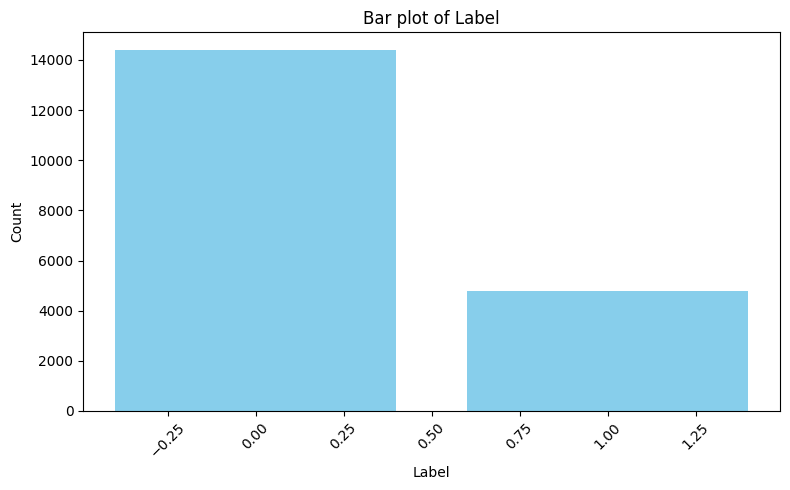

In [ ]:
target_col = data['f13']
bar_plot(target_col, "Label")

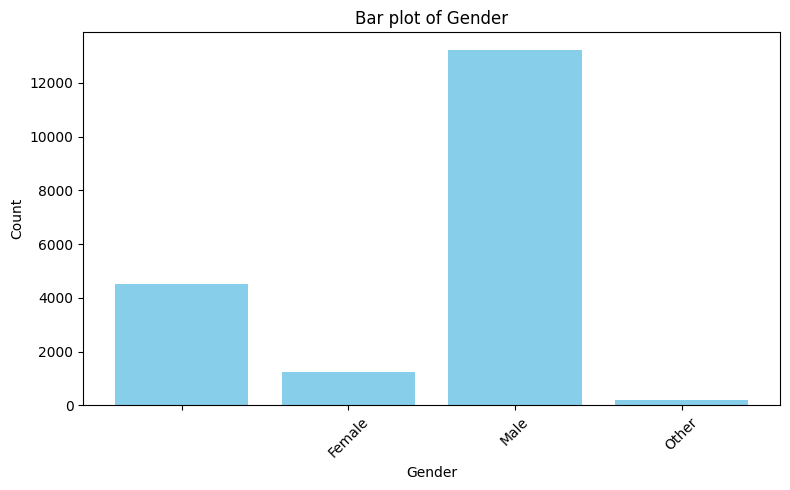

In [11]:
gender_col = data['f3']
bar_plot(gender_col, 'Gender')

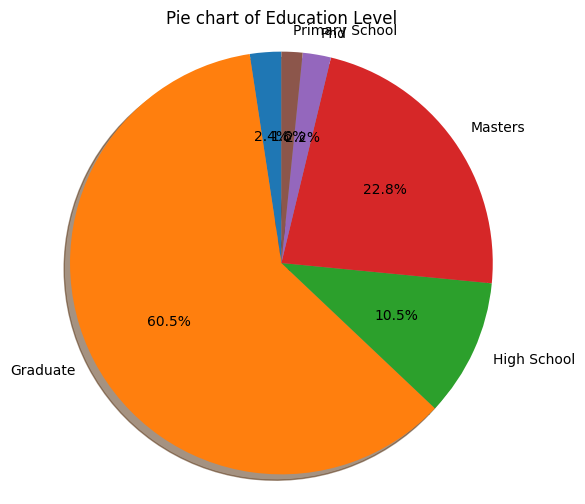

In [13]:
edu_col = data['f6']
pie_plot(edu_col, 'Education Level')

### Biểu đồ tương quan giữa từng feature đến target

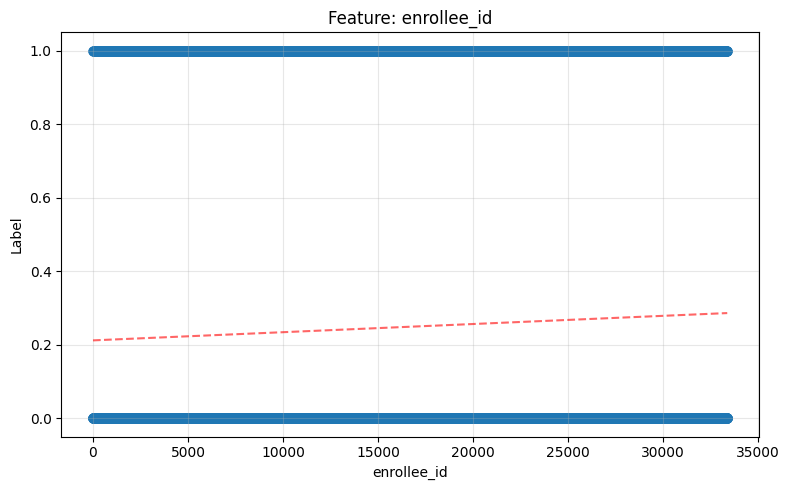

Skipping city - too many categories (123). Showing top 10.


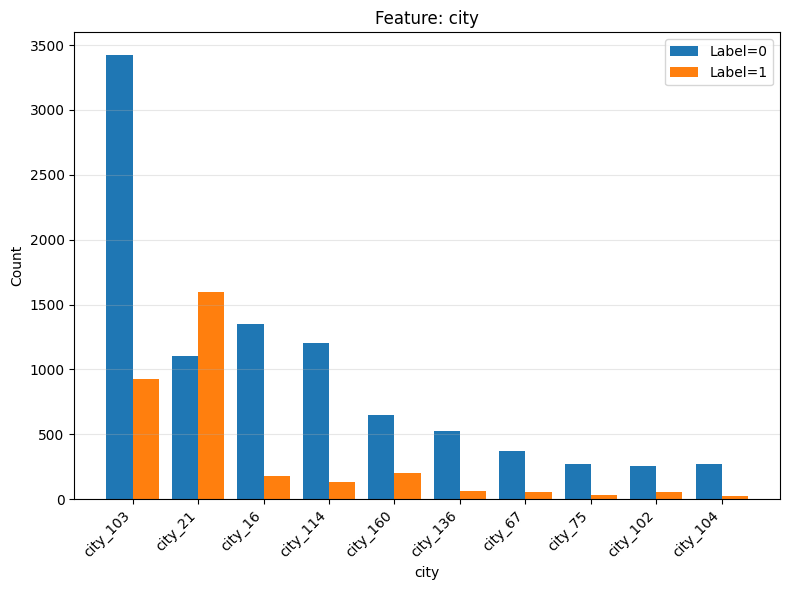

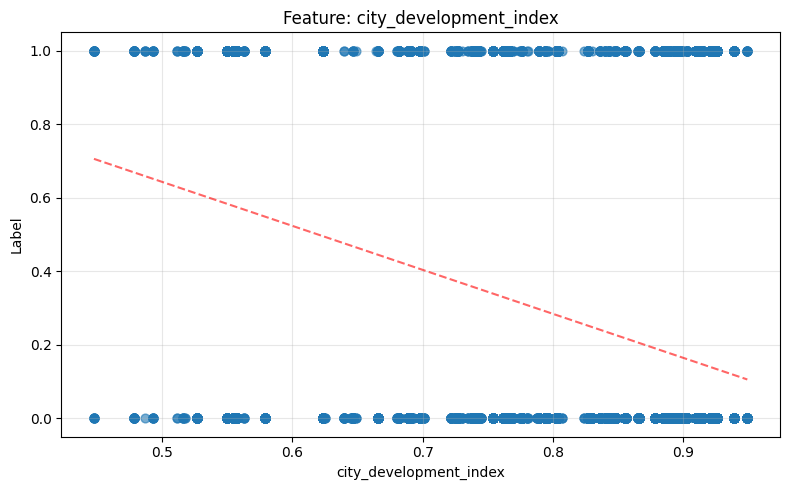

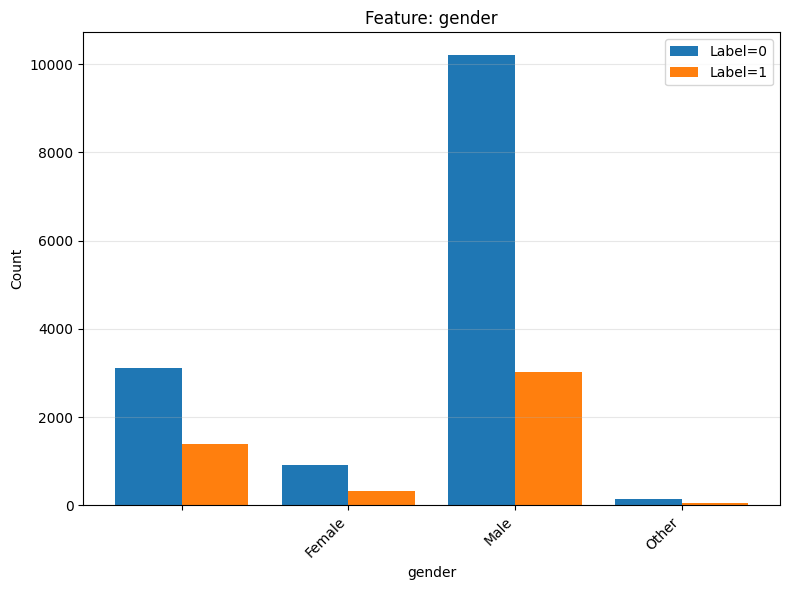

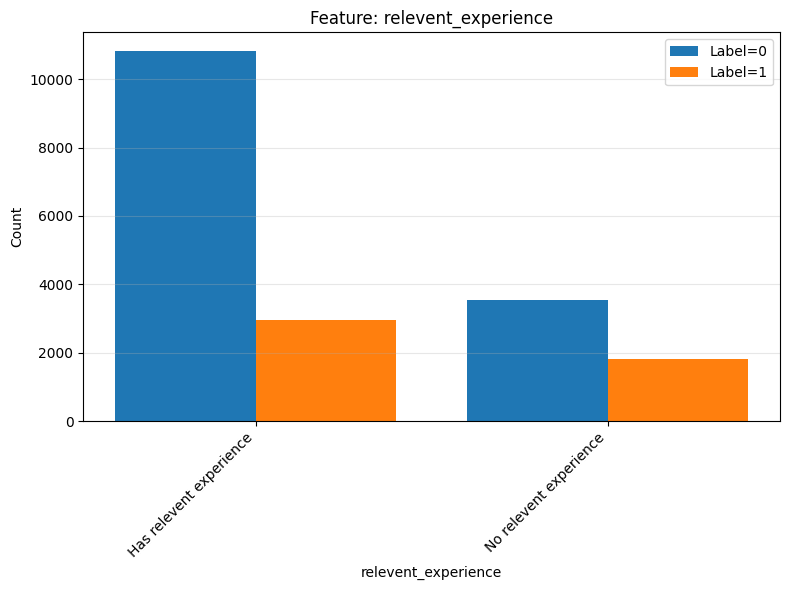

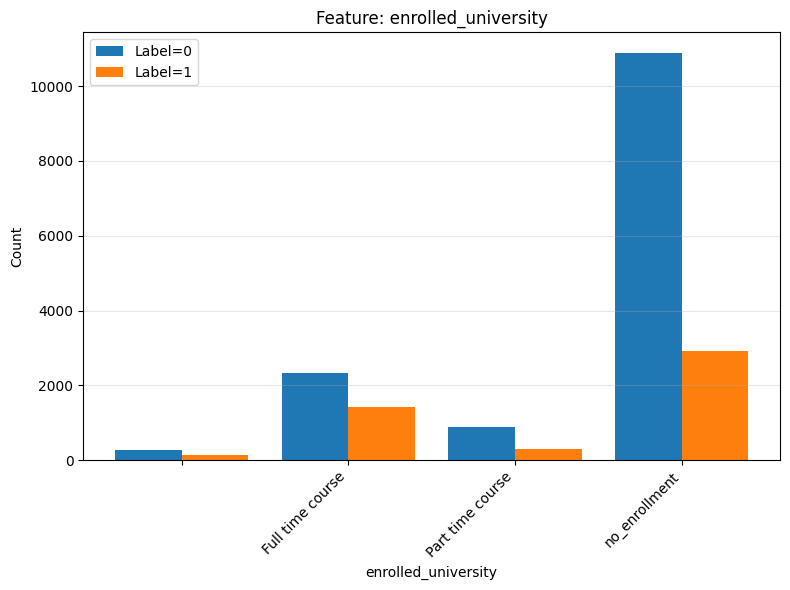

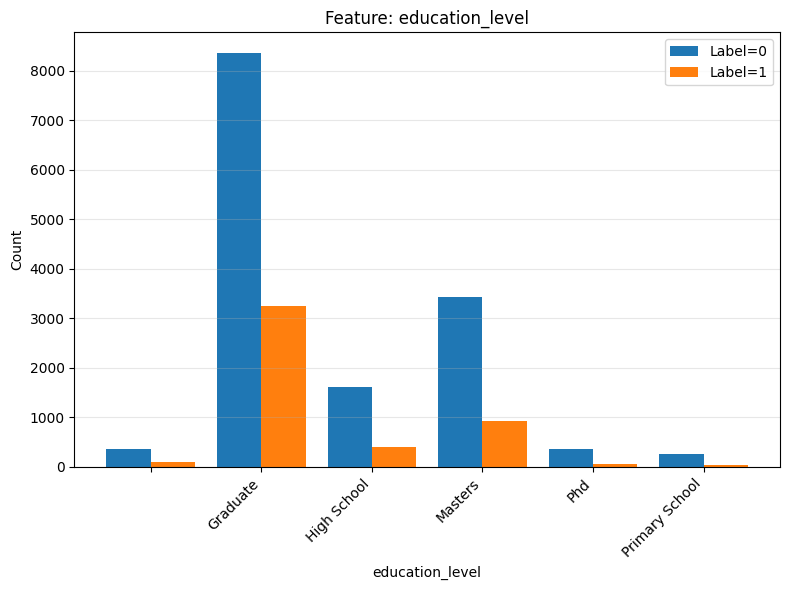

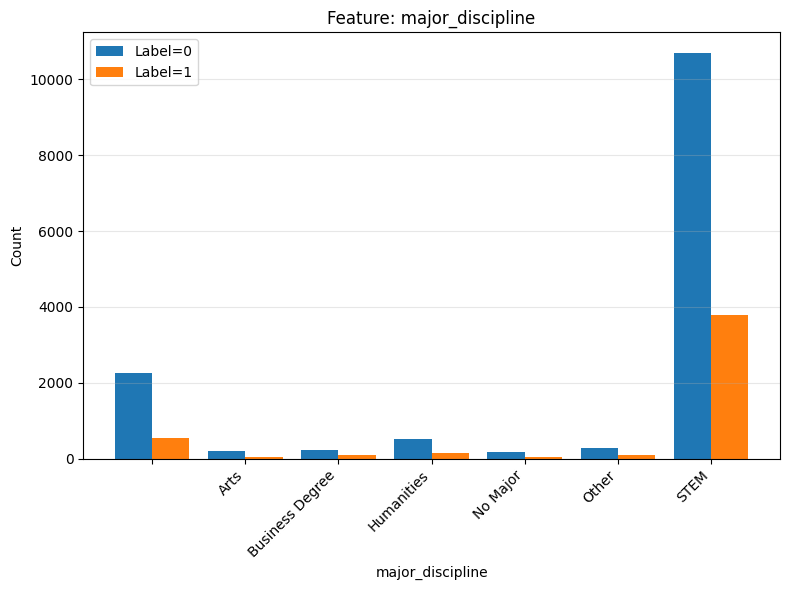

Skipping experience - too many categories (23). Showing top 10.


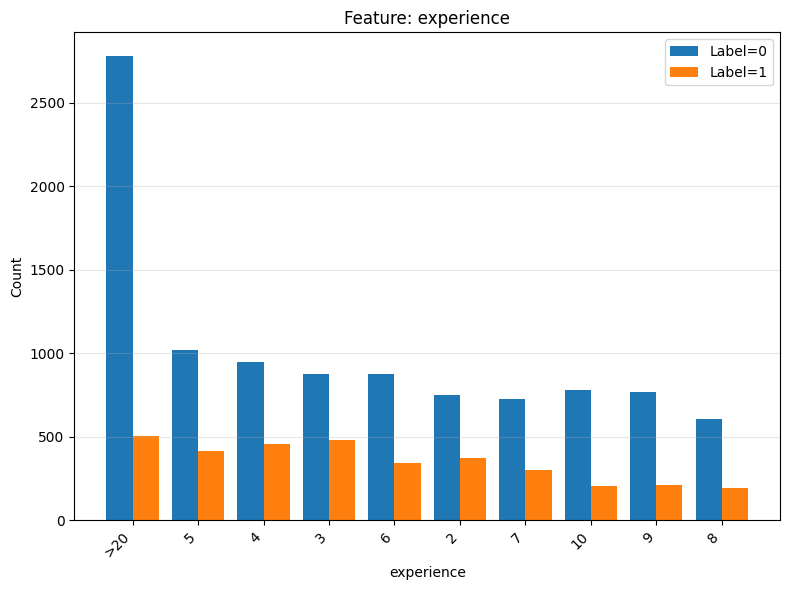

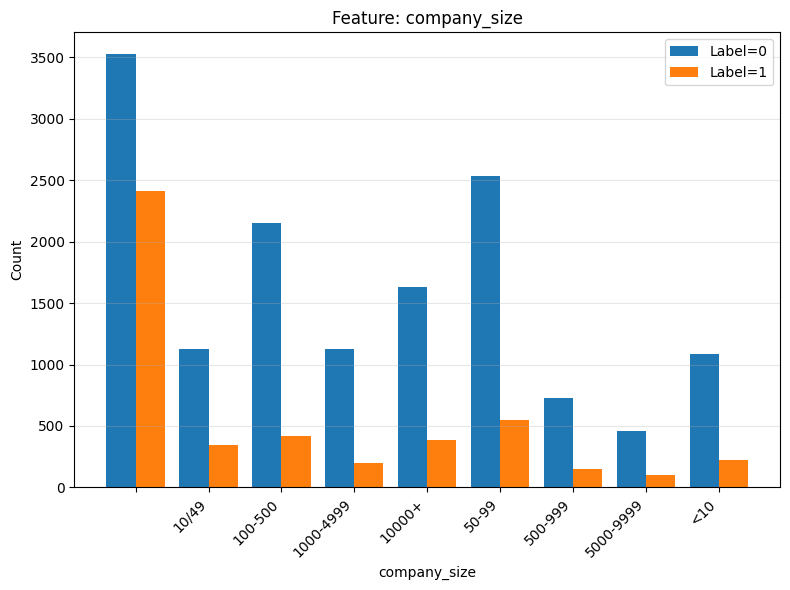

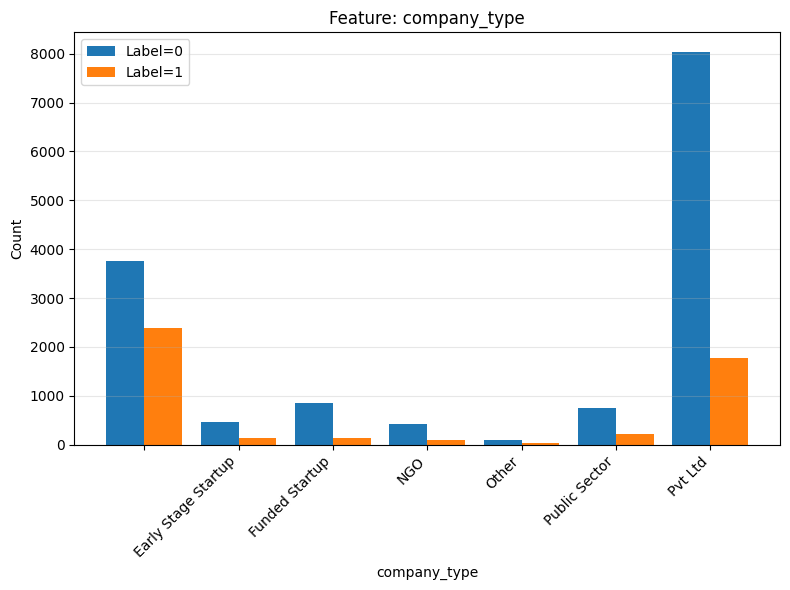

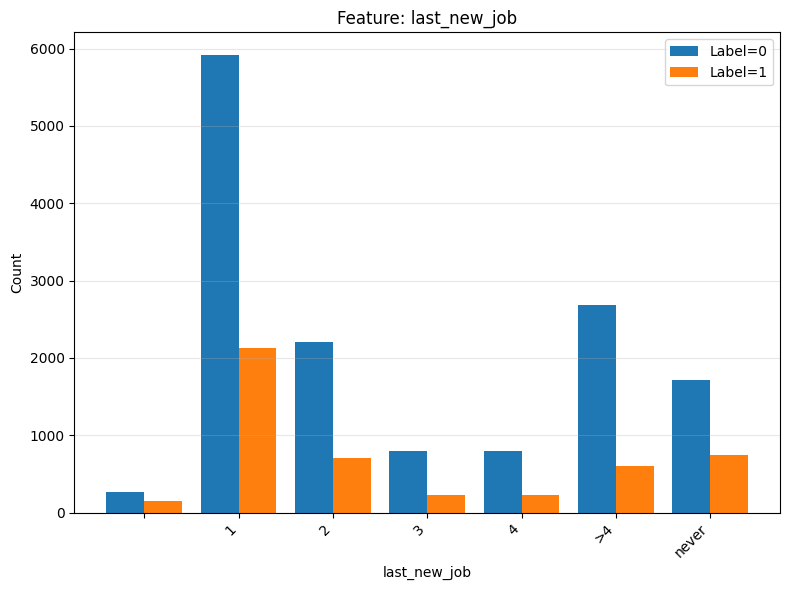

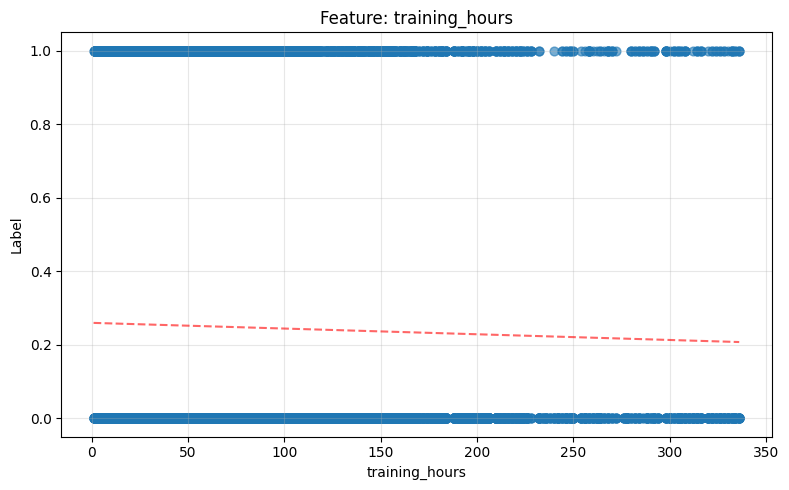

In [6]:
y = data['f13'].astype(int)

# Features
feature_cols = [name for name in data.dtype.names if name != 'f13']
X = np.column_stack([data[name] for name in feature_cols])
visualize_features(X, y)

#### Một số nhận xét qua biểu đồ trên:
- Imbalanced Data: Ta thấy rõ ràng label=0 nhiều hơn hẳn label=1 
- Missing values: Nhiều feature có tỉ lệ missing value khá lớn

### Một số câu hỏi

#### Câu hỏi 1: Chúng ta có thể tìm hiểu gì về ứng viên

In [7]:
# Giới tính
gender = data['f3']
unique_gender, counts_gender = np.unique(gender, return_counts=True)
print("\nPhân bố giới tính:")
for g, c in zip(unique_gender, counts_gender):
    label = g if g.strip() else "Không xác định"
    print(f"  {label}: {c} ({c/len(gender)*100:.1f}%)")

# Kinh nghiệm liên quan
rel_exp = data['f4']
unique_exp, counts_exp = np.unique(rel_exp, return_counts=True)
print("\nKinh nghiệm liên quan:")
for e, c in zip(unique_exp, counts_exp):
    print(f"  {e}: {c} ({c/len(rel_exp)*100:.1f}%)")

# Trình độ học vấn
edu = data['f6']
unique_edu, counts_edu = np.unique(edu, return_counts=True)
sorted_edu = sorted(zip(unique_edu, counts_edu), key=lambda x: x[1], reverse=True)
print("\nTrình độ học vấn:")
for e, c in sorted_edu:
    label = e if e.strip() else "Không xác định"
    print(f"  {label}: {c} ({c/len(edu)*100:.1f}%)")


Phân bố giới tính:
  Không xác định: 4508 (23.5%)
  Female: 1238 (6.5%)
  Male: 13221 (69.0%)
  Other: 191 (1.0%)

Kinh nghiệm liên quan:
  Has relevent experience: 13792 (72.0%)
  No relevent experience: 5366 (28.0%)

Trình độ học vấn:
  Graduate: 11598 (60.5%)
  Masters: 4361 (22.8%)
  High School: 2017 (10.5%)
  Không xác định: 460 (2.4%)
  Phd: 414 (2.2%)
  Primary School: 308 (1.6%)


##### Ta thấy một số đặc điểm nổi bật của ứng viên:
- Giới tính: chủ yếu là nam(69%)
- Kinh nghiệm: đa số đều có kinh ngiệm(72%)
- Trình độ học vấn: đa số đều đã tốt nghiệp đại học

#### Câu hỏi 2: Yếu tố nào ảnh hưởng đến quyết định chuyển việc?

In [8]:
# Phân tích theo kinh nghiệm
experience = data['f8']
target = data['f13']

print("Tỷ lệ chuyển việc theo số năm kinh nghiệm:")
unique_exp_years = np.unique(experience)
exp_analysis = []
for exp in unique_exp_years:
    if exp.strip():
        mask = experience == exp
        target_subset = target[mask]
        target_subset = target_subset[~np.isnan(target_subset)]
        if len(target_subset) > 0:
            rate = np.mean(target_subset) * 100
            count = len(target_subset)
            exp_analysis.append((exp, rate, count))

exp_analysis.sort(key=lambda x: x[1], reverse=True)
for exp, rate, count in exp_analysis:
    print(f"  {exp:>5} năm: {rate:5.1f}% ({count} ứng viên)")


# Phân tích theo quy mô công ty
company_size = data['f9']
print("\nTỷ lệ chuyển việc theo quy mô công ty:")
unique_sizes = np.unique(company_size)
company_analysis = []

for size in unique_sizes:
    if size.strip():
        mask = company_size == size
        target_subset = target[mask]
        target_subset = target_subset[~np.isnan(target_subset)]
        if len(target_subset) > 0:
            rate = np.mean(target_subset) * 100
            count = len(target_subset)
            company_analysis.append((size, rate, count))

company_analysis.sort(key=lambda x: x[1], reverse=True)
for size, rate, count in company_analysis:
    print(f"  {size:15}: {rate:5.1f}% ({count} ứng viên)")

# Phân tích theo loại công ty
company_type = data['f10']
print("\nTỷ lệ chuyển việc theo loại công ty:")
unique_types = np.unique(company_type)
type_analysis = []

for ctype in unique_types:
    if ctype.strip():
        mask = company_type == ctype
        target_subset = target[mask]
        target_subset = target_subset[~np.isnan(target_subset)]
        if len(target_subset) > 0:
            rate = np.mean(target_subset) * 100
            count = len(target_subset)
            type_analysis.append((ctype, rate, count))

type_analysis.sort(key=lambda x: x[1], reverse=True)
for ctype, rate, count in type_analysis:
    print(f"  {ctype:25}: {rate:5.1f}% ({count} ứng viên)")


Tỷ lệ chuyển việc theo số năm kinh nghiệm:
     <1 năm:  45.4% (522 ứng viên)
      1 năm:  42.4% (549 ứng viên)
      3 năm:  35.3% (1354 ứng viên)
      2 năm:  33.2% (1127 ứng viên)
      4 năm:  32.6% (1403 ứng viên)
      7 năm:  29.5% (1028 ứng viên)
      5 năm:  28.8% (1430 ứng viên)
      6 năm:  28.2% (1216 ứng viên)
      8 năm:  24.3% (802 ứng viên)
     11 năm:  22.7% (664 ứng viên)
     20 năm:  22.3% (148 ứng viên)
      9 năm:  21.7% (980 ứng viên)
     10 năm:  21.0% (985 ứng viên)
     13 năm:  19.3% (399 ứng viên)
     12 năm:  18.6% (494 ứng viên)
     14 năm:  18.3% (586 ứng viên)
     19 năm:  17.4% (304 ứng viên)
     17 năm:  16.7% (342 ứng viên)
     15 năm:  16.6% (686 ứng viên)
     18 năm:  15.4% (280 ứng viên)
    >20 năm:  15.3% (3286 ứng viên)
     16 năm:  14.2% (508 ứng viên)

Tỷ lệ chuyển việc theo quy mô công ty:
  10/49          :  23.4% (1471 ứng viên)
  10000+         :  19.1% (2019 ứng viên)
  5000-9999      :  18.1% (563 ứng viên)
  50-99        

##### Nhận xét về tỉ lệ chuyển việc:
- Theo thời gian làm(năm): đặc biệt cao ở năm đầu tiên(45%), và làm càng lâu thì tỉ lệ càng giảm dần -> chứng tỏ người lao động khi càng ổn định thì càng ít chuyển việc
- Theo quy mô công ty(số người): Công ty nhỏ (10-49 nhân viên) có tỷ lệ chuyển việc cao nhất(23.4%) và công ty rất lớn (10000+) có tỷ lệ cao thứ 2: 19.1% -> Tỷ lệ chuyển việc cao ở cả hai cực - công ty rất nhỏ và rất lớn.
- Theo loại công ty: Startup giai đoạn đầu có tỷ lệ chuyển việc cao gấp 1.7 lần so với startup đã được funding

#### Câu hỏi 3: Thành phố nào có tỷ lệ chuyển việc cao nhất

In [9]:
city = data['f1']
city_dev_index = data['f2']

print("Top 10 thành phố có tỷ lệ chuyển việc cao nhất:")
unique_cities = np.unique(city)
city_analysis = []

for c in unique_cities:
    mask = city == c
    target_subset = target[mask]
    target_subset = target_subset[~np.isnan(target_subset)]
    if len(target_subset) > 30:
        rate = np.mean(target_subset) * 100
        count = len(target_subset)
        dev_idx = np.mean(city_dev_index[mask])
        city_analysis.append((c, rate, count, dev_idx))

city_analysis.sort(key=lambda x: x[1], reverse=True)

for i, (c, rate, count, dev_idx) in enumerate(city_analysis[:10], 1):
    print(f"{i:2d}. {c:12}: {rate:5.1f}% | {count:5,} ứng viên | Dev Index: {dev_idx:.3f}")

print("\nPhân tích mối quan hệ City Development Index và tỷ lệ chuyển việc:")

low_dev = city_dev_index < 0.7
mid_dev = (city_dev_index >= 0.7) & (city_dev_index < 0.85)
high_dev = city_dev_index >= 0.85

for label, mask in [("Phát triển thấp (<0.7)", low_dev),
                    ("Phát triển trung bình (0.7-0.85)", mid_dev),
                    ("Phát triển cao (>0.85)", high_dev)]:
    target_subset = target[mask]
    target_subset = target_subset[~np.isnan(target_subset)]
    if len(target_subset) > 0:
        rate = np.mean(target_subset) * 100
        count = len(target_subset)
        print(f"{label:35}: {rate:5.1f}% ({count:,} ứng viên)")

Top 10 thành phố có tỷ lệ chuyển việc cao nhất:
 1. city_11     :  59.5% |   247 ứng viên | Dev Index: 0.550
 2. city_21     :  59.1% | 2,702 ứng viên | Dev Index: 0.624
 3. city_145    :  58.7% |    63 ứng viên | Dev Index: 0.555
 4. city_101    :  57.3% |    75 ứng viên | Dev Index: 0.558
 5. city_128    :  56.5% |    92 ứng viên | Dev Index: 0.527
 6. city_74     :  51.9% |   104 ứng viên | Dev Index: 0.579
 7. city_78     :  51.6% |    31 ứng viên | Dev Index: 0.579
 8. city_70     :  43.2% |    44 ứng viên | Dev Index: 0.698
 9. city_143    :  39.0% |    41 ứng viên | Dev Index: 0.740
10. city_115    :  38.9% |    54 ứng viên | Dev Index: 0.789

Phân tích mối quan hệ City Development Index và tỷ lệ chuyển việc:
Phát triển thấp (<0.7)             :  51.0% (4,556 ứng viên)
Phát triển trung bình (0.7-0.85)   :  20.7% (2,397 ứng viên)
Phát triển cao (>0.85)             :  16.0% (12,205 ứng viên)


##### Nhận xét:
- Chỉ số Dev Index càng thấp thì tỉ lệ chuyển việc càng cao
- Thành phố phát triển thấp (<0.7) có tỷ lệ chuyển việc CAO GẤP 3 LẦN so với thành phố phát triển cao(>0.85) 51.0% vs 16.0% -> Chứng tỏ tỉ lệ chuyển việc phụ thuộc khá nhiều vào mức độ phát triển của thành phố, càng phát triển thì càng ít chuyển